In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=100, n_features=3, centers=2,
                 random_state=101)

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [6]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

from mpl_toolkits.mplot3d import Axes3D

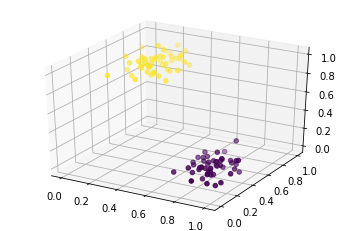

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x, data_y, data_z, c=data[1])

In [10]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [12]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

In [13]:
learning_rate = 0.01

In [14]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [15]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [16]:
loss = tf.reduce_mean(tf.square(outputs-X))

In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [18]:
init = tf.global_variables_initializer()

In [21]:
num_steps = 1000
with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train, feed_dict={X:scaled_data})
        
    output_2d = hidden.eval(feed_dict={X:scaled_data})

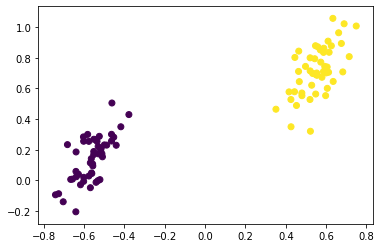

In [23]:
plt.scatter(output_2d[:,0],output_2d[:,1], c=data[1])

# Excercise

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('D:/SAME/Faradars/Python/04-Udemy - complete guide to tensorflow for deep learning with python/TensorFlow Bootcamp/05-Autoencoders/anonymized_data.csv')
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,NVFW,VLBG,IDIX,UVHN,IWOT,LEMB,QMYY,XDGR,ODZS,LNJS,WDRT,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,0.454458,-3.855839,-6.248326,4.934422,10.008317,-4.298336,-8.814638,3.817839,2.896091,-5.350594,4.048589,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,-9.003987,-8.940399,6.156711,9.587159,-6.242118,-3.958827,2.793432,-6.120728,5.127779,-2.374059,4.341376,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,-7.163735,-7.004002,4.678410,9.168494,-7.139517,-4.774317,4.358969,-6.179764,4.207522,0.508184,4.028944,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,1.430195,-0.991499,-5.153022,5.491574,9.525384,-7.426677,-8.496024,2.671595,4.386845,-4.692552,3.974559,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,-1.132032,-3.827855,-5.659445,4.374395,8.222426,-6.008160,-8.804945,4.699459,3.988987,-4.276795,3.799633,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
EJWY     500 non-null float64
VALM     500 non-null float64
EGXO     500 non-null float64
HTGR     500 non-null float64
SKRF     500 non-null float64
NNSZ     500 non-null float64
NYLC     500 non-null float64
GWID     500 non-null float64
TVUT     500 non-null float64
CJHI     500 non-null float64
NVFW     500 non-null float64
VLBG     500 non-null float64
IDIX     500 non-null float64
UVHN     500 non-null float64
IWOT     500 non-null float64
LEMB     500 non-null float64
QMYY     500 non-null float64
XDGR     500 non-null float64
ODZS     500 non-null float64
LNJS     500 non-null float64
WDRT     500 non-null float64
LKKS     500 non-null float64
UOBF     500 non-null float64
VBHE     500 non-null float64
FRWU     500 non-null float64
NDYZ     500 non-null float64
QSBO     500 non-null float64
JDUB     500 non-null float64
TEVK     500 non-null float64
EZTM     500 non-null flo

In [28]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('Label', axis=1))

In [29]:
num_inputs = 30
num_hidden = 2
num_outputs = num_inputs

learning_rate = 0.01

In [30]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [31]:
hidden = fully_connected(X, num_hidden, activation_fn=None)

In [32]:
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [33]:
loss = tf.reduce_mean(tf.square(outputs-X))

In [34]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [35]:
init = tf.global_variables_initializer()

In [48]:
num_steps = 5000

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        sess.run(train, feed_dict={X:scaled_data})

In [49]:
with tf.Session() as sess:
    sess.run(init)
    
    output_2d = hidden.eval(feed_dict={X:scaled_data})

In [50]:
output_2d.shape

(500, 2)

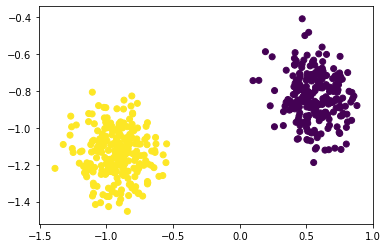

In [51]:
plt.scatter(output_2d[:,0], output_2d[:,1], c=df['Label'])

# Stacked Autoencoder

In [52]:
from tensorflow.examples.tutorials.mnist import input_data

In [53]:
mnist = input_data.read_data_sets('D:/SAME\Faradars/Python/04-Udemy - complete guide to tensorflow for deep learning with python/TensorFlow Bootcamp/03-Convolutional-Neural-Networks/MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:/SAME\Faradars/Python/04-Udemy - complete guide to tensorflow for deep learning with python/TensorFlow Bootcamp/03-Convolutional-Neural-Networks/MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:/SAME\Faradars/Python/04-Udemy - complete guide to tensorflow for deep learning with python/TensorFlow Bootcamp/03-Convolutional-Neural-Networks/MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting D:/SAME\Faradars/Python/04-Udemy - complete guide to tensorflow for deep learning with python/TensorFlow Bootcamp/03-Convolutional-Neural-Networks/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting D:/SAM

In [54]:
num_inputs = 784             # 784
neurons_hid1 = 392           # 392
neurons_hid2 = 196           # 196
neurons_hid3 = neurons_hid1  # 392
num_outputs = num_outputs    # 784

In [55]:
learning_rate = 0.01

In [56]:
actf = tf.nn.relu

In [57]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [58]:
initializer = tf.variance_scaling_initializer()

In [59]:
w1 = tf.Variable(initializer([num_inputs, neurons_hid1]),dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]),dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]),dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]),dtype=tf.float32)

In [60]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [61]:
act_func = tf.nn.relu

In [63]:
hid_layer1 = act_func(tf.matmul(X,w1)+b1)
hid_layer2 = act_func(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = act_func(tf.matmul(hid_layer2,w3)+b3)
output_layer = act_func(tf.matmul(hid_layer3,w4)+b4)

In [64]:
loss = tf.reduce_mean(tf.square(output_layer-X))

In [65]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [66]:
train = optimizer.minimize(loss)

In [67]:
init = tf.global_variables_initializer()

In [68]:
saver = tf.train.Saver()

In [69]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples//batch_size
        
        for i in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            
            sess.run(train,feed_dict={X:X_batch})
            
        training_loss = loss.eval(feed_dict={X:X_batch})
        
        print('epoch: {} Loss: {}'.format(epoch,training_loss))
        
    saver.save(sess,'.example_stacked_autoencoder.ckpt')

epoch: 0 Loss: 0.025795085355639458
epoch: 1 Loss: 0.02189738303422928
epoch: 2 Loss: 0.02169298380613327
epoch: 3 Loss: 0.020019406452775
epoch: 4 Loss: 0.019956357777118683


In [72]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,'.example_stacked_autoencoder.ckpt')
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from .example_stacked_autoencoder.ckpt


In [73]:
results

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]], dtype=float32)

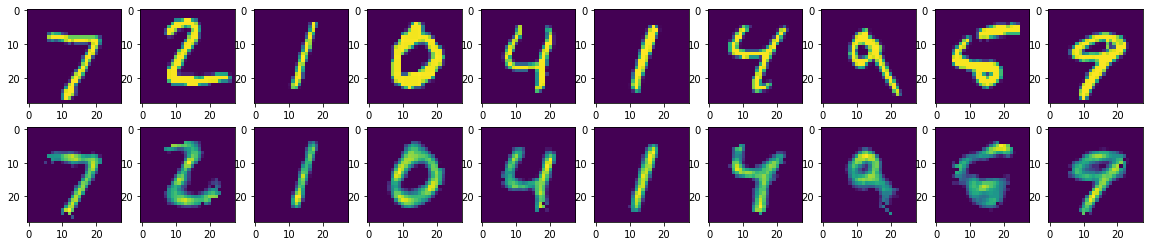

In [76]:
f, a = plt.subplots(2, 10, figsize=(20,4))

for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    a[1][i].imshow(np.reshape(results[i],(28,28)))

In [77]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,'.example_stacked_autoencoder.ckpt')
    
    results = hid_layer3.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from .example_stacked_autoencoder.ckpt


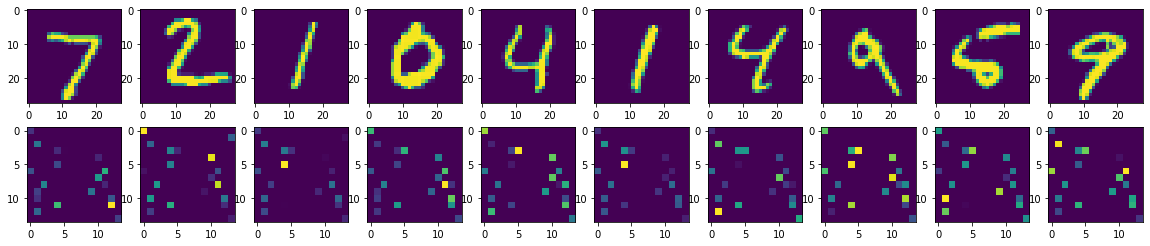

In [78]:
f, a = plt.subplots(2, 10, figsize=(20,4))

for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    a[1][i].imshow(np.reshape(results[i],(14,14)))